# Construction/Starts

## Notebook Links:
[Home](index.ipynb)

[Resale Market](resales.ipynb)

[Construction/Starts](starts.ipynb)

[Rental Market](rental.ipynb)

[Economic Drivers](economics.ipynb)

[Demograhics/Migration](demographics.ipynb)

## HTML Links:
[Home](index.html)

[Resale Market](resales.html)

[Construction/Starts](starts.html)

[Rental Market](rental.html)

[Economic Drivers](economics.html)

[Demograhics/Migration](demographics.html)

Data on starts, construction activity in Calgary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Arial')


In [6]:
saar = pd.read_csv('..\\data\\pareto\\single_starts_saar.csv',index_col=0)
saar=saar.join(pd.read_csv('..\\data\\pareto\\multi_starts_saar.csv',index_col=0))
saar=saar.join(pd.read_csv('..\\data\\pareto\\total_starts_saar.csv',index_col=0))
saar.index=saar.index.rename('Date')
saar.index=pd.DatetimeIndex(saar.index,freq='QS-OCT')
saar=saar.dropna()


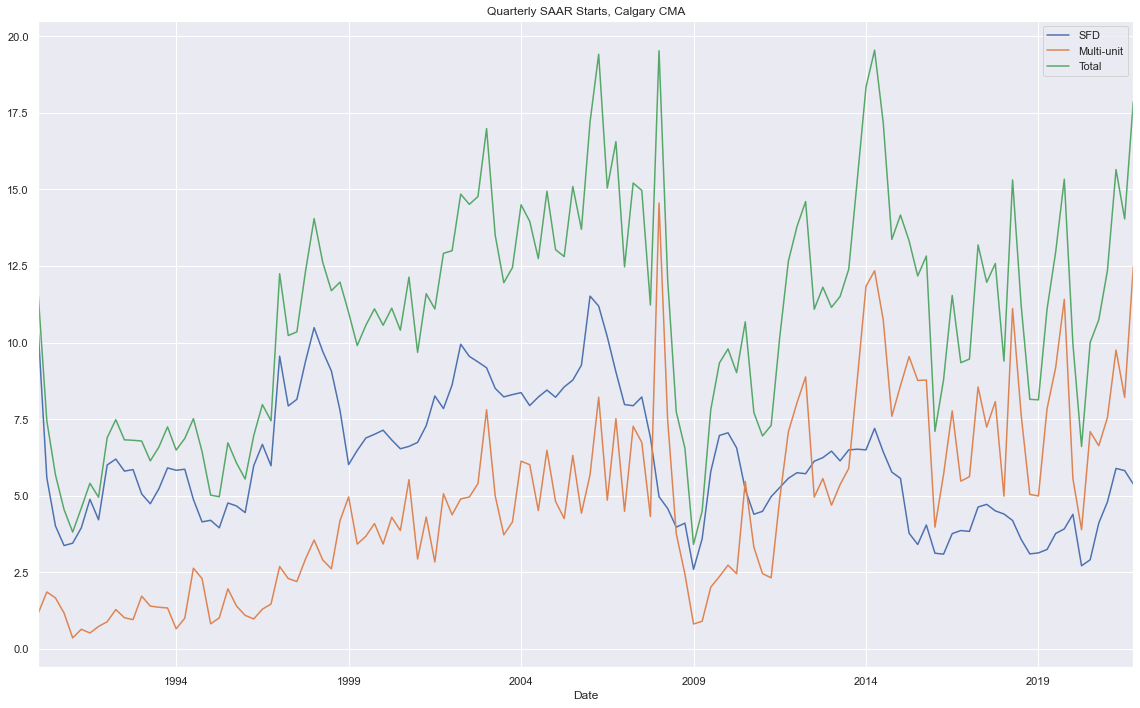

In [7]:
saar[['single_starts_saar','multi_starts_saar','total_starts_saar']].plot(title='Quarterly SAAR Starts, Calgary CMA', figsize=(16,10))
plt.legend(['SFD','Multi-unit','Total'])
plt.tight_layout()
plt.savefig('kbase_graphs/saar_full.png')